## Preprocessing

In [50]:
using Serialization
using DataStructures

In [56]:
include("plotting.jl")

generateComparisonTable (generic function with 2 methods)

Load the results of first approach:

In [25]:
results_folder = "results/"
filename_1 = results_folder * "1_ensemble_results.jl"

# Load the results
approach1_obj = open(filename_1, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.877439, 0.904652, 0.9…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.870088, 0.793015, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.783158, 0.780282, 0.9…

The same for the second approach:

In [36]:
filename_2 = results_folder * "2_ensemble_results.jl"

# Load the results
approach2_obj = open(filename_2, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.740351, 0.804483, 0.7…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.777053, 0.863052, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.762807, 0.809416, 0.7…

Now, let's put in the same object the results of both approaches:

In [51]:
loaded_obj = OrderedDict(
    :Voting_Soft_Raw => approach1_obj[:Voting_Soft],
    :Voting_Soft_PCA => approach2_obj[:Voting_Soft],
    :Voting_Hard_Raw => approach1_obj[:Voting_Hard],
    :Voting_Hard_PCA => approach2_obj[:Voting_Hard],
    :Stacking_Raw => approach1_obj[:Stacking],
    :Stacking_PCA => approach2_obj[:Stacking],
)

OrderedDict{Symbol, Dict{String, Any}} with 6 entries:
  :Voting_Soft_Raw => Dict("class_results"=>[Dict(:recall=>[0.870088, 0.793015,…
  :Voting_Soft_PCA => Dict("class_results"=>[Dict(:recall=>[0.777053, 0.863052,…
  :Voting_Hard_Raw => Dict("class_results"=>[Dict(:recall=>[0.877439, 0.904652,…
  :Voting_Hard_PCA => Dict("class_results"=>[Dict(:recall=>[0.740351, 0.804483,…
  :Stacking_Raw    => Dict("class_results"=>[Dict(:recall=>[0.783158, 0.780282,…
  :Stacking_PCA    => Dict("class_results"=>[Dict(:recall=>[0.762807, 0.809416,…

In [57]:
model_names, metrics, metric_means, metric_stds, metric_means_class, metric_stds_class, metric_maxes, metric_maxes_class = aggregateMetrics(loaded_obj, 3, ensemble=true)

(Any["Voting_Soft_Raw", "Voting_Soft_PCA", "Voting_Hard_Raw", "Voting_Hard_PCA", "Stacking_Raw", "Stacking_PCA"], [:accuracy, :precision, :recall, :f1_score], Dict{Symbol, Vector{Any}}(:recall => [0.7682166554132766, 0.7534822272044394, 0.7664042410440801, 0.7567805913010593, 0.7696621124052715, 0.758448971692311], :f1_score => [0.7530429190958778, 0.7346587600974366, 0.7471990688272785, 0.738443785452601, 0.7581925002767683, 0.7454592755188433], :precision => [0.754577100244893, 0.7379606802557795, 0.7512582002067012, 0.7416138000701873, 0.7570294820628011, 0.7436684926272055], :accuracy => [0.8464240448629162, 0.8348181888400734, 0.8446466856790236, 0.8370306357446593, 0.8481344398430334, 0.8399729468694064]), Dict{Symbol, Vector{Any}}(:recall => [0.008876155003997178, 0.007495767222414446, 0.008639165652528652, 0.008835809801661534, 0.00790772068331056, 0.011266020775829411], :f1_score => [0.008933379661860174, 0.0073303598749102925, 0.010048890498821232, 0.008789364958470347, 0.009

## Analysis of the results

### General plots

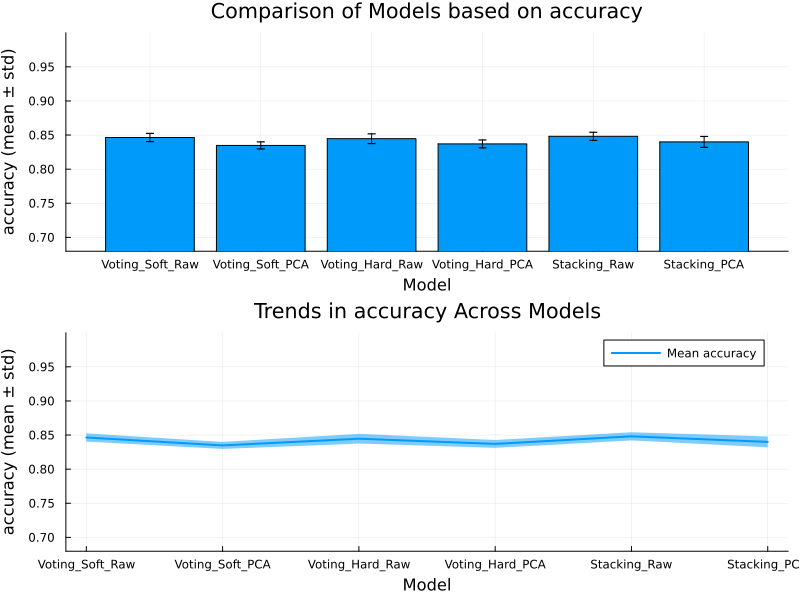

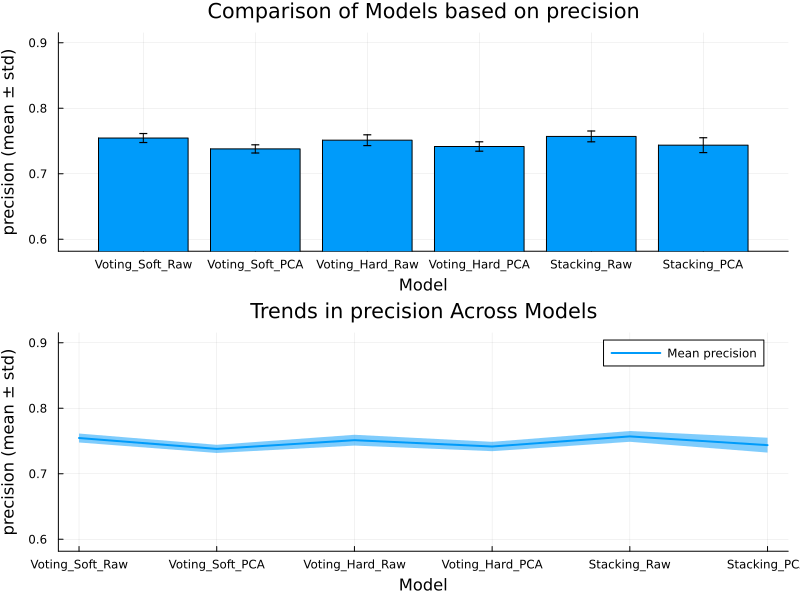

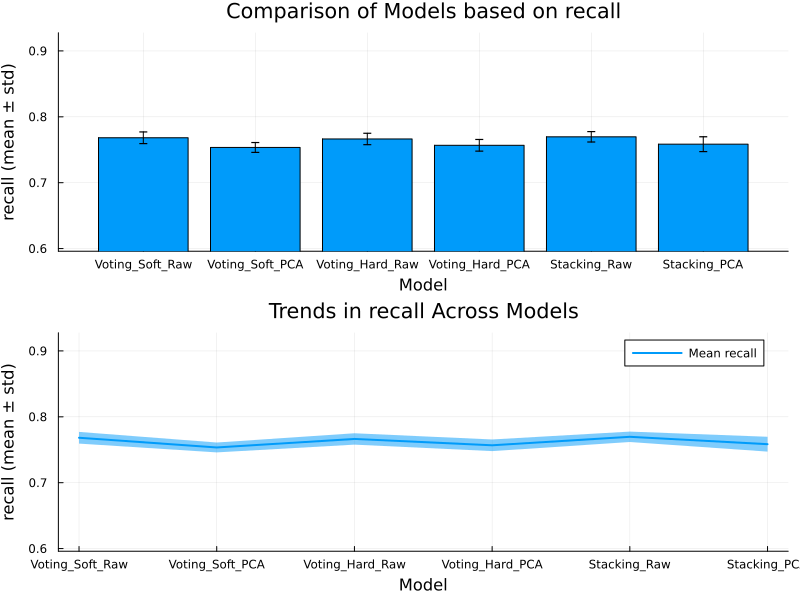

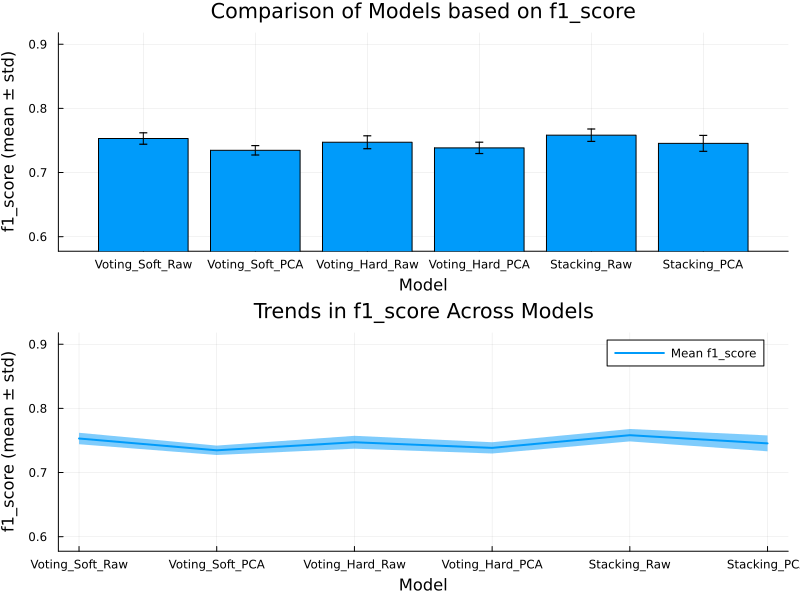

In [58]:
plotCombinedMetrics(model_names, metrics, metric_means, metric_stds, output_dir="./plots/Comparison_1_2/ensembles", show=true)

### Plots per class

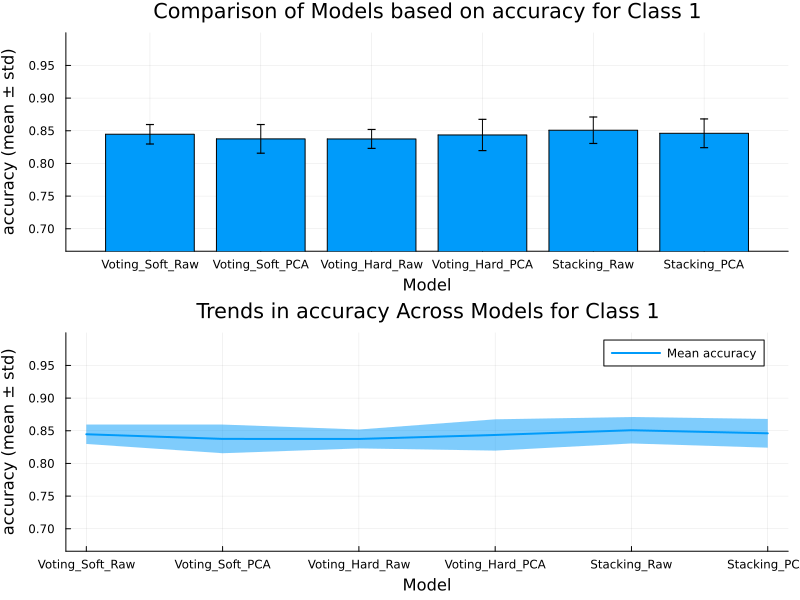

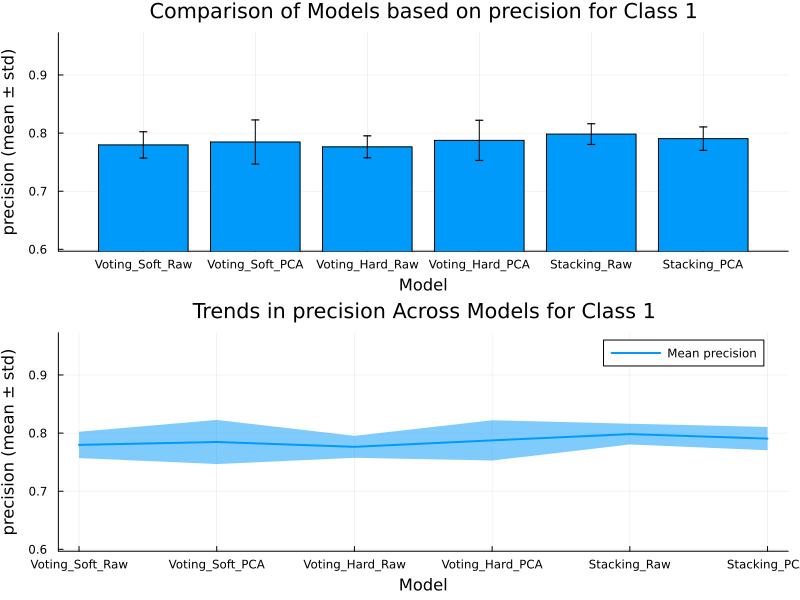

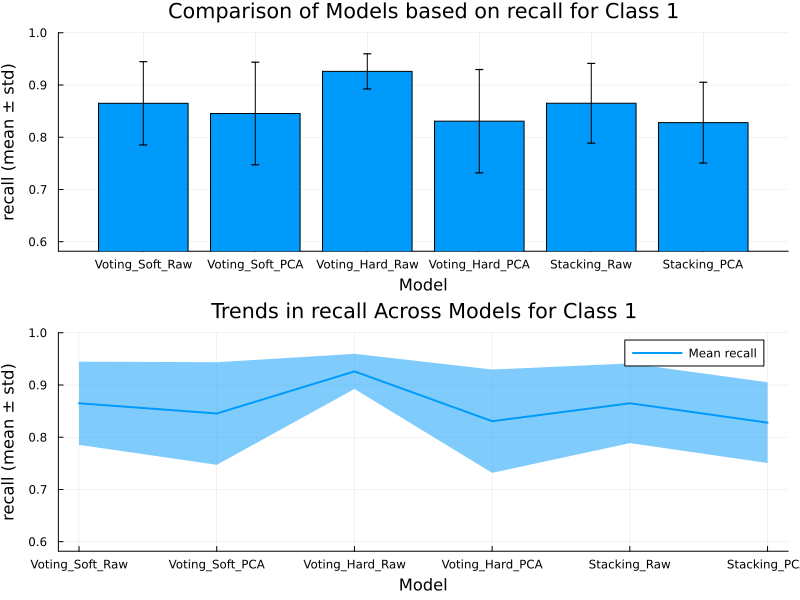

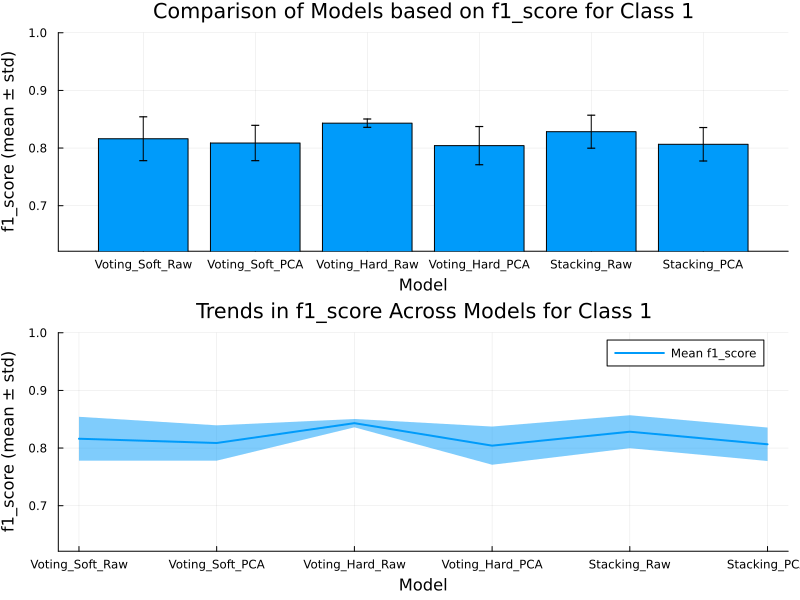

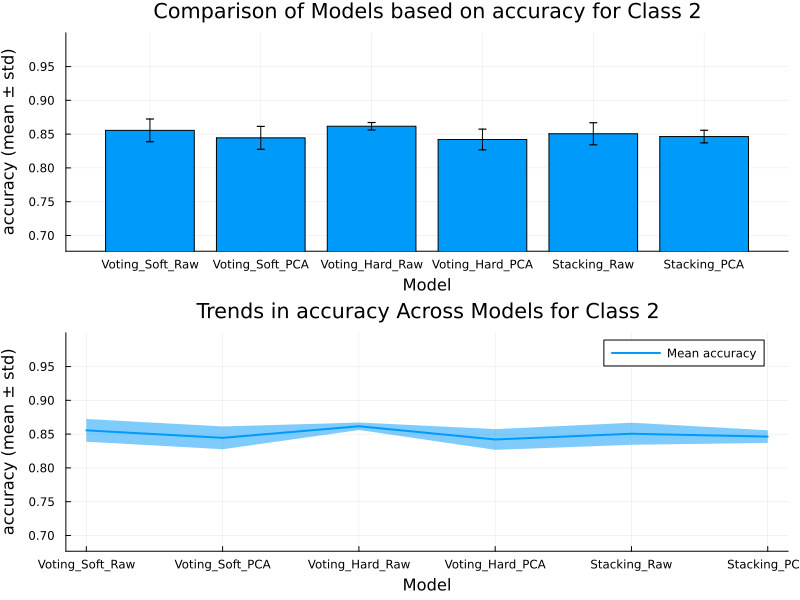

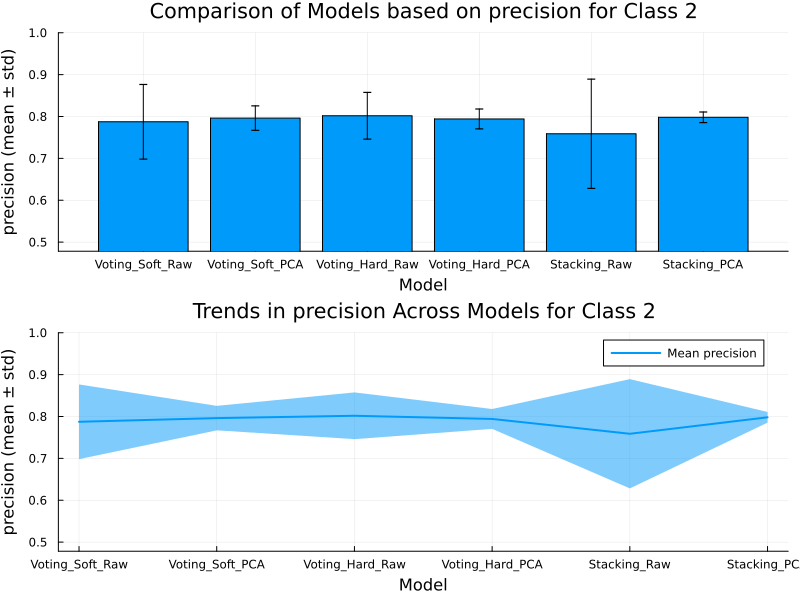

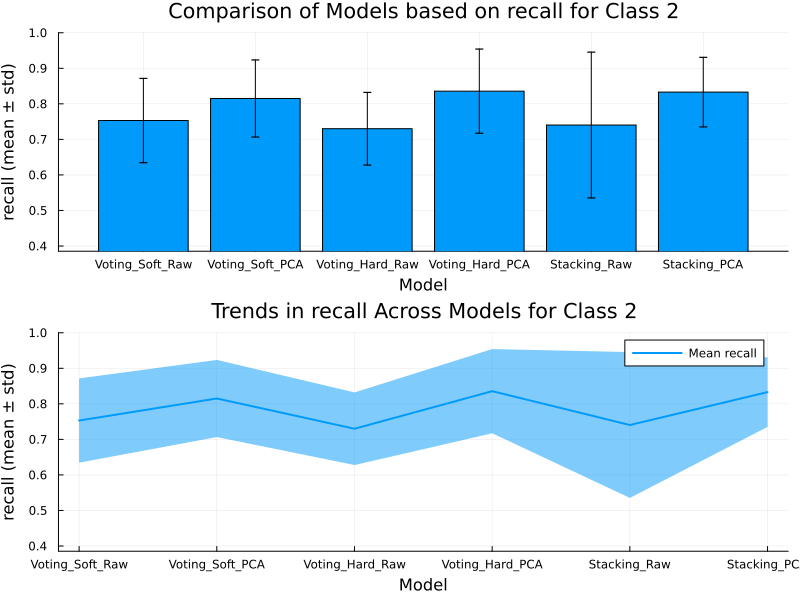

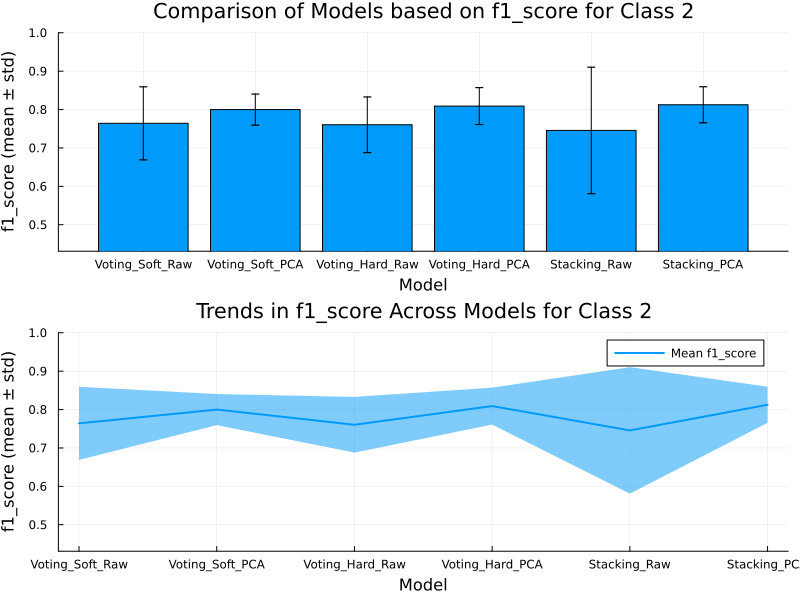

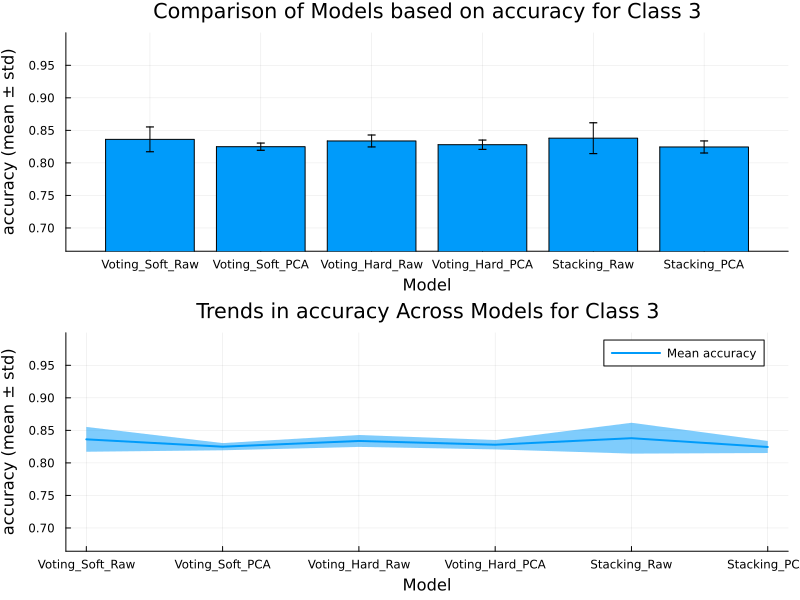

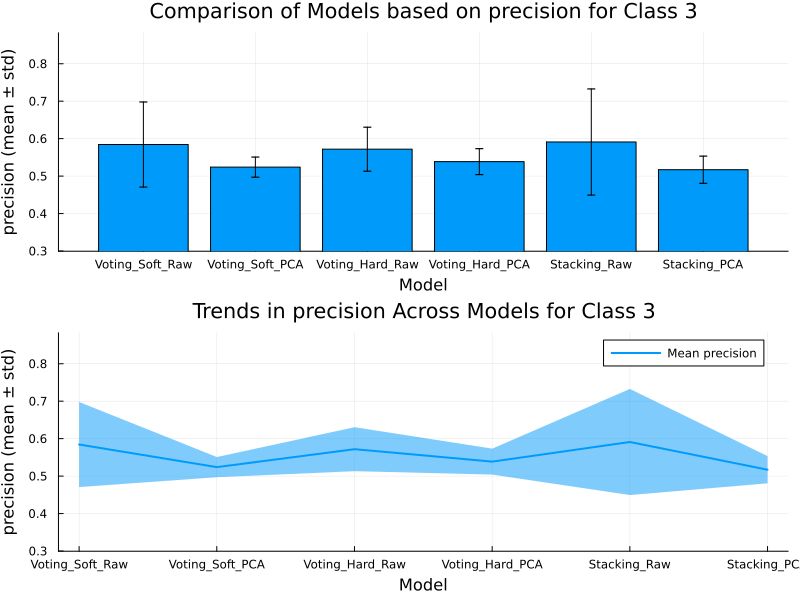

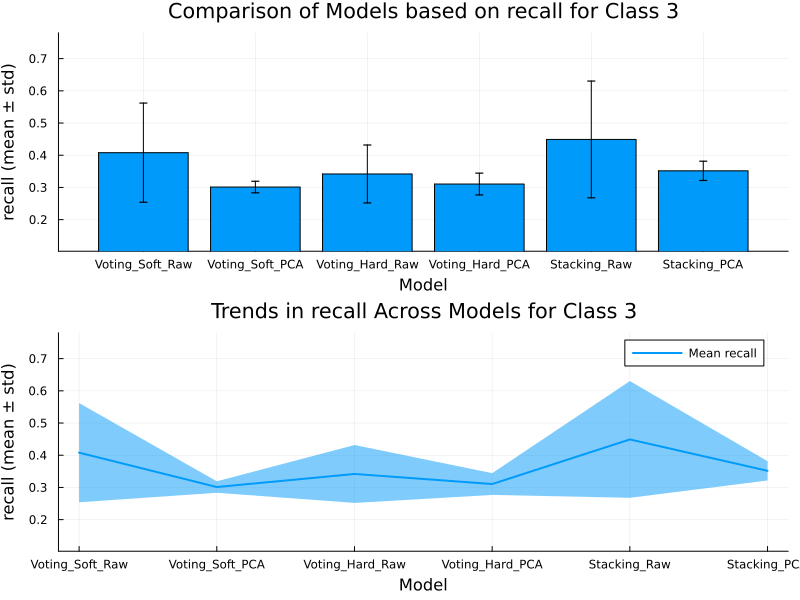

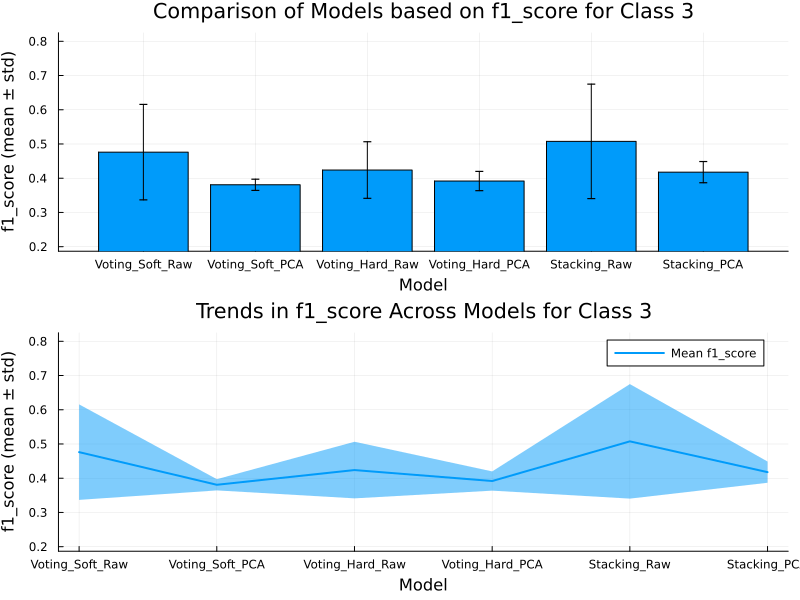

In [59]:
plotCombinedMetrics(model_names, 3, metrics, metric_means_class, metric_stds_class, output_dir="./plots/Comparison_1_2/ensembles/class", show=true)

### General table

In [60]:
generateComparisonTable(model_names, metrics, metric_maxes; sort_by=:f1_score, rev=true)


Comparison of Maximum Metrics Across Models (Sorted by f1_score):
┌─────────────────┬──────────┬───────────┬────────┬──────────┐
│           Model │ Accuracy │ Precision │ Recall │ F1-Score │
├─────────────────┼──────────┼───────────┼────────┼──────────┤
│    Stacking_Raw │    0.853 │     0.766 │  0.777 │    0.767 │
│ Voting_Soft_Raw │    0.852 │     0.763 │  0.777 │    0.763 │
│    Stacking_PCA │    0.848 │     0.756 │  0.769 │    0.758 │
│ Voting_Hard_Raw │    0.853 │      0.76 │  0.777 │    0.757 │
│ Voting_Hard_PCA │    0.841 │     0.747 │  0.762 │    0.747 │
│ Voting_Soft_PCA │    0.838 │     0.743 │  0.758 │     0.74 │
└─────────────────┴──────────┴───────────┴────────┴──────────┘


### Tables per class

In [61]:
generateComparisonTable(model_names, 3, metrics, metric_maxes_class; sort_by=:f1_score, rev=true)


Comparison of Maximum Metrics Across Models for Class 1 (Sorted by f1_score):
┌─────────────────┬──────────┬───────────┬────────┬──────────┐
│           Model │ Accuracy │ Precision │ Recall │ F1-Score │
├─────────────────┼──────────┼───────────┼────────┼──────────┤
│ Voting_Hard_Raw │    0.856 │     0.798 │  0.956 │    0.854 │
│    Stacking_Raw │    0.875 │     0.823 │  0.925 │    0.854 │
│ Voting_Soft_Raw │    0.862 │     0.809 │  0.943 │    0.847 │
│ Voting_Hard_PCA │    0.872 │     0.842 │  0.941 │    0.838 │
│    Stacking_PCA │    0.868 │     0.822 │  0.919 │    0.837 │
│ Voting_Soft_PCA │    0.867 │     0.847 │  0.943 │    0.836 │
└─────────────────┴──────────┴───────────┴────────┴──────────┘

Comparison of Maximum Metrics Across Models for Class 2 (Sorted by f1_score):
┌─────────────────┬──────────┬───────────┬────────┬──────────┐
│           Model │ Accuracy │ Precision │ Recall │ F1-Score │
├─────────────────┼──────────┼───────────┼────────┼──────────┤
│    Stacking_Raw │    